## Child Height Prediction

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

In [2]:
df=pd.read_csv('child_height.csv')

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1,0
1,1,78.5,67.0,F,69.2,4,0,1
2,1,78.5,67.0,F,69.0,4,0,1
3,1,78.5,67.0,F,69.0,4,0,1
4,2,75.5,66.5,M,73.5,4,1,0
...,...,...,...,...,...,...,...,...
885,203,62.0,66.0,M,64.0,3,1,0
886,203,62.0,66.0,F,62.0,3,0,1
887,203,62.0,66.0,F,61.0,3,0,1
888,204,62.5,63.0,M,66.5,2,1,0


In [5]:
df.gender.replace(['M','F'],[0,1],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   family  890 non-null    int64  
 1   father  890 non-null    float64
 2   mother  890 non-null    float64
 3   gender  890 non-null    int64  
 4   height  890 non-null    float64
 5   kids    890 non-null    int64  
 6   male    890 non-null    int64  
 7   female  890 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [7]:
df.describe()

,family,father,mother,gender,height,kids,male,female
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,104.319101,69.239438,64.076180,0.483146,66.756404,6.119101,0.516854,0.483146
std,56.654314,2.480363,2.315739,0.499997,3.586242,2.691355,0.499997,0.499997
min,1.000000,62.000000,58.000000,0.000000,56.000000,1.000000,0.000000,0.000000
25%,58.000000,68.000000,63.000000,0.000000,64.000000,4.000000,0.000000,0.000000
50%,104.000000,69.000000,64.000000,0.000000,66.500000,6.000000,1.000000,0.000000
75%,155.000000,71.000000,65.500000,1.000000,69.700000,8.000000,1.000000,1.000000
max,204.000000,78.500000,70.500000,1.000000,79.000000,15.000000,1.000000,1.000000


In [8]:
df.isnull().s

,family,father,mother,gender,height,kids,male,female
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False


In [9]:
print("Null values couunt:\n",df.isnull().sum())

Null values couunt:
 family    0
father    0
mother    0
gender    0
height    0
kids      0
male      0
female    0
dtype: int64


In [10]:
f=df.columns[1:-1]
print("\n correltion of each attribute with height:\n")
for i in f:
    corr=df[i].corr(df['height'])
    print(i,":",corr)


 correltion of each attribute with height:

father : 0.2768008110348267
mother : 0.20203872284119695
gender : -0.7126729743888253
height : 1.0
kids : -0.12847496133255157
male : 0.7126729743888252


<AxesSubplot:>

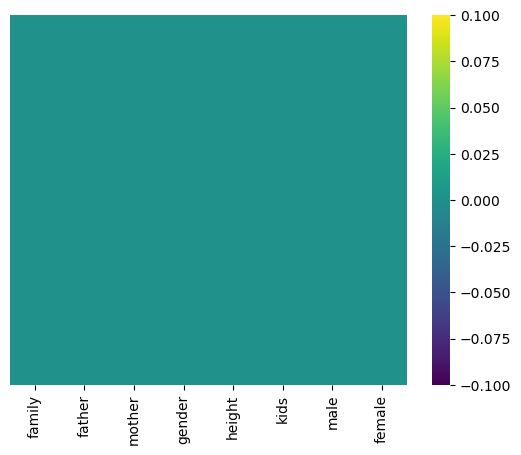

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')


<AxesSubplot:>

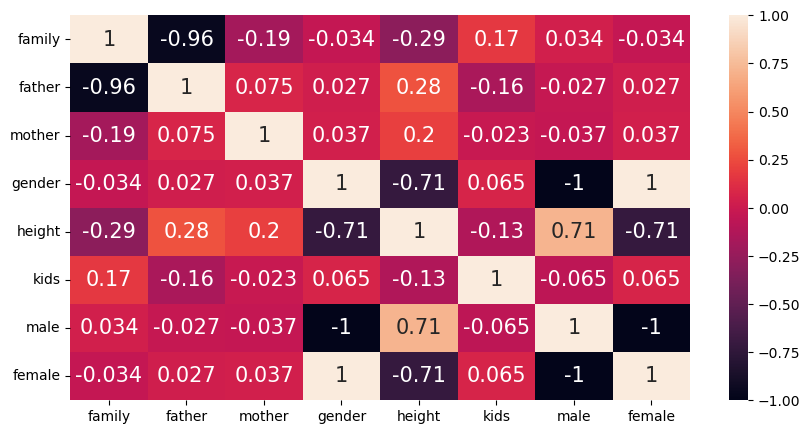

In [12]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, annot_kws = {"size":15})

<AxesSubplot:xlabel='gender', ylabel='count'>

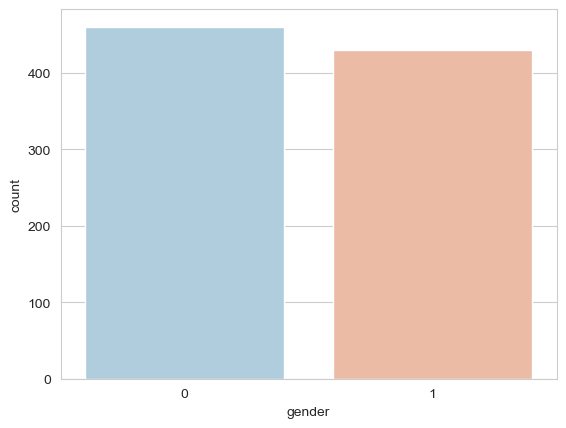

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'gender', data = df, palette = 'RdBu_r')

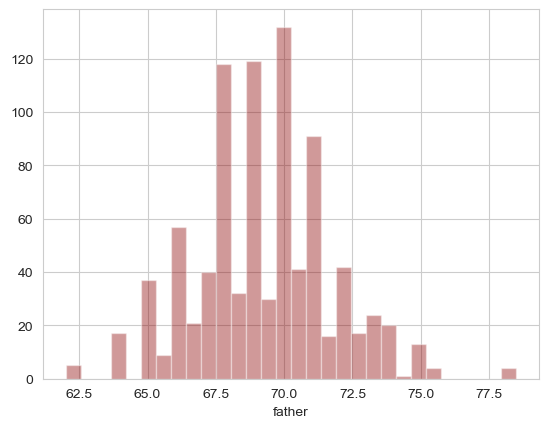

In [14]:
sns.distplot(df['father'].dropna(), kde = False, color = 'darkred', bins = 30);

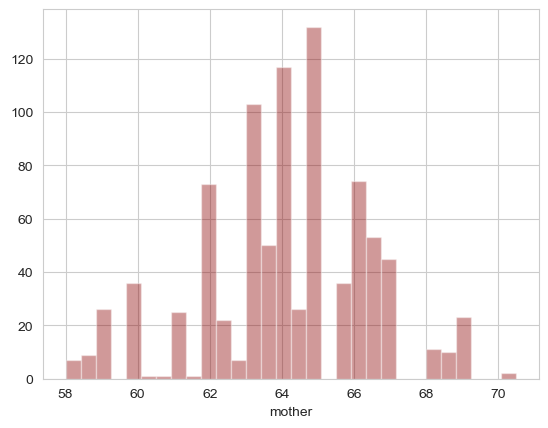

In [15]:
sns.distplot(df['mother'].dropna(), kde = False, color = 'darkred', bins = 30);

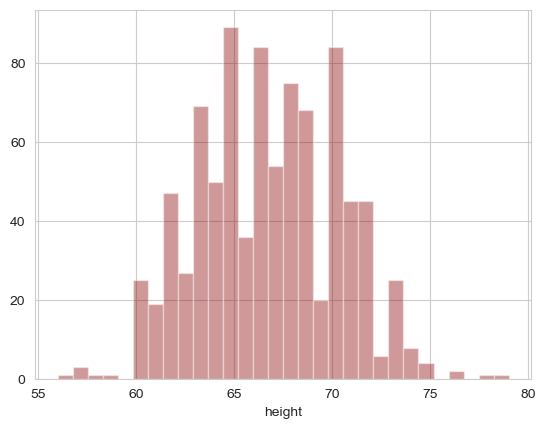

In [16]:
sns.distplot(df['height'].dropna(), kde = False, color = 'darkred', bins = 30);

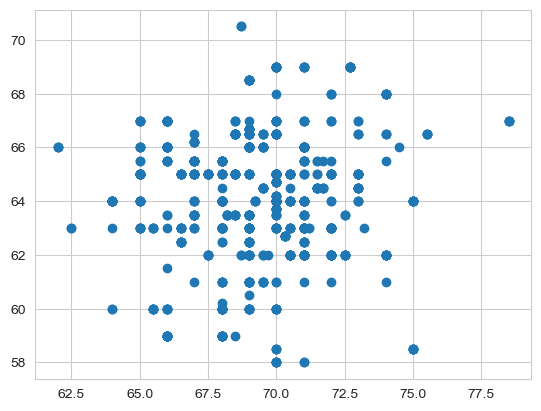

In [17]:
plt.scatter(df['father'], df['mother'],cmap='viridis')

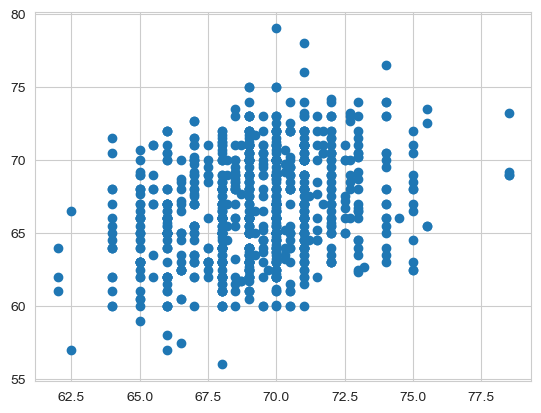

In [18]:
plt.scatter(df['father'], df['height'],cmap='viridis')

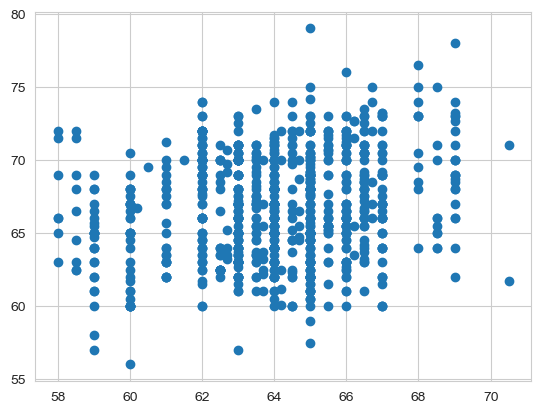

In [19]:
plt.scatter(df['mother'], df['height'],cmap='viridis')

<AxesSubplot:xlabel='father', ylabel='Density'>

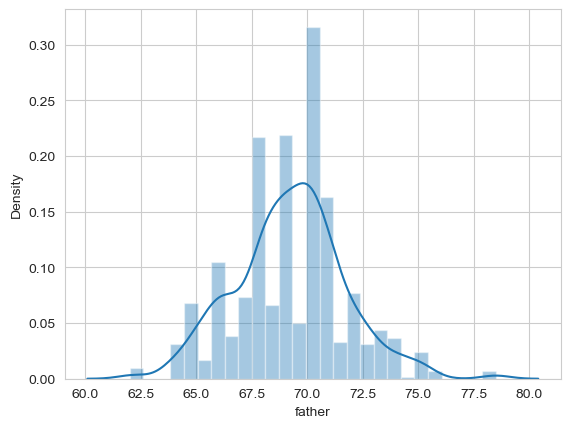

In [20]:
sns.distplot(df['father'])

<AxesSubplot:xlabel='mother', ylabel='Density'>

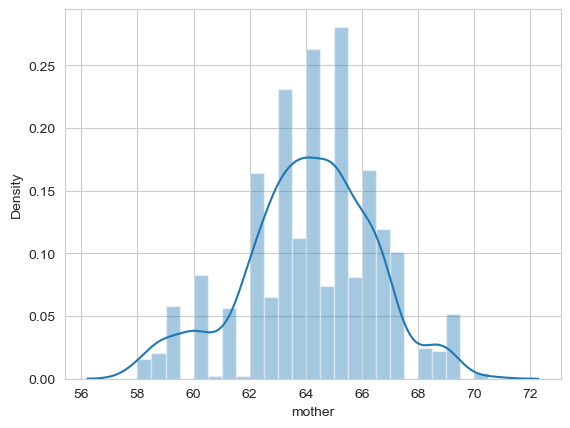

In [21]:
sns.distplot(df['mother'])

<AxesSubplot:xlabel='height', ylabel='Density'>

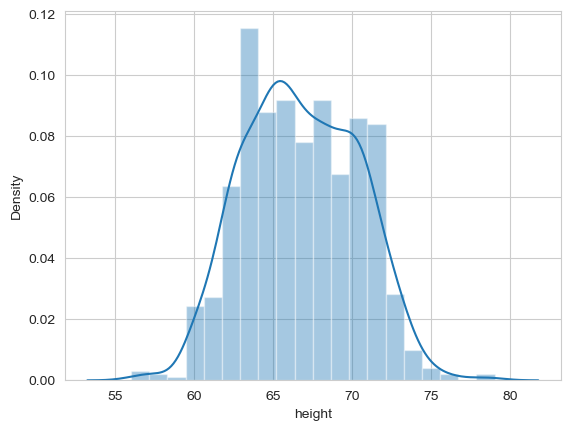

In [22]:
sns.distplot(df['height'])

<AxesSubplot:ylabel='father'>

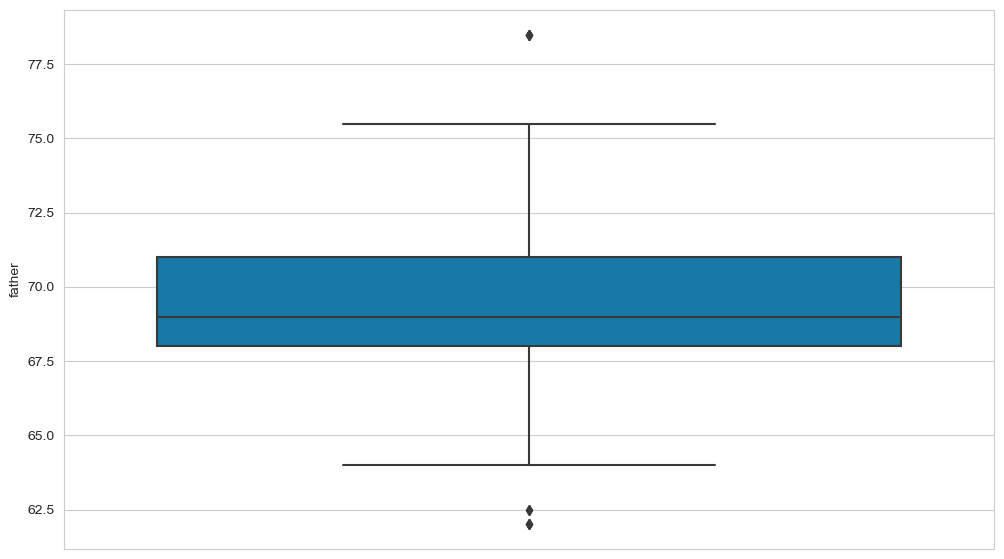

In [23]:
plt.figure(figsize=(12,7))
sns.boxplot(y ='father',  data = df, palette = 'winter')

<AxesSubplot:ylabel='mother'>

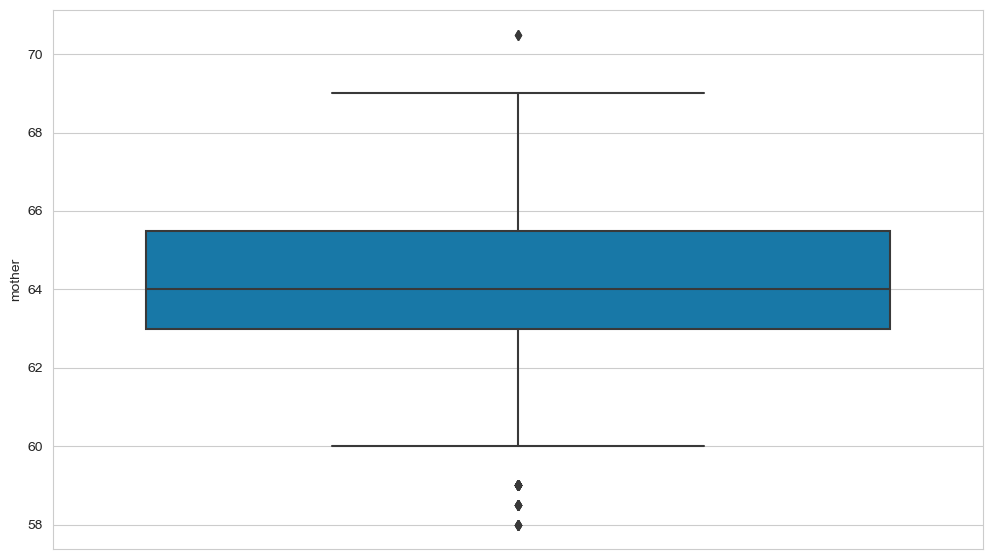

In [24]:
plt.figure(figsize = (12, 7))
sns.boxplot(y = 'mother', data = df, palette = 'winter')

<AxesSubplot:ylabel='height'>

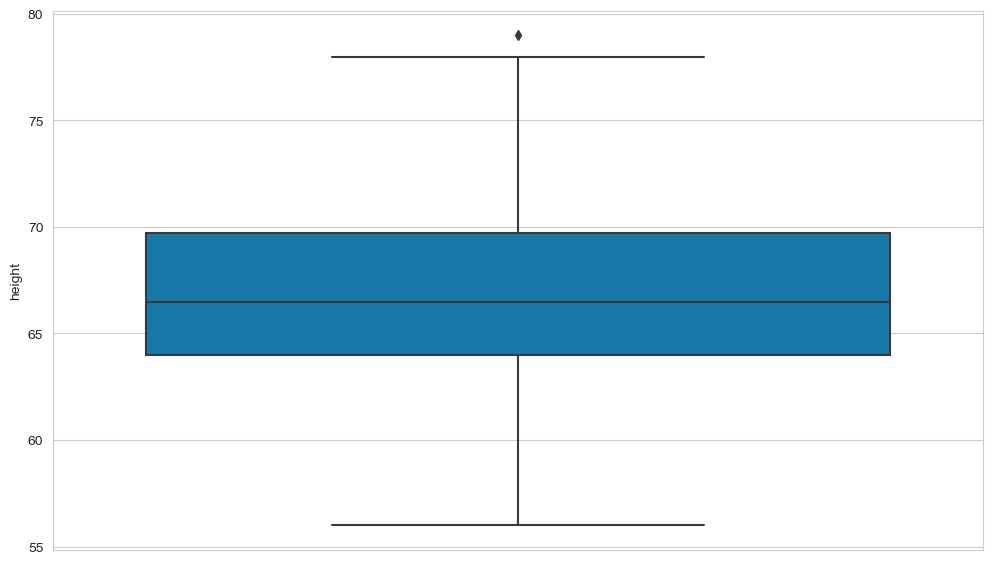

In [25]:
plt.figure(figsize = (12, 7))
sns.boxplot(y = 'height', data = df, palette = 'winter')

<AxesSubplot:xlabel='gender', ylabel='height'>

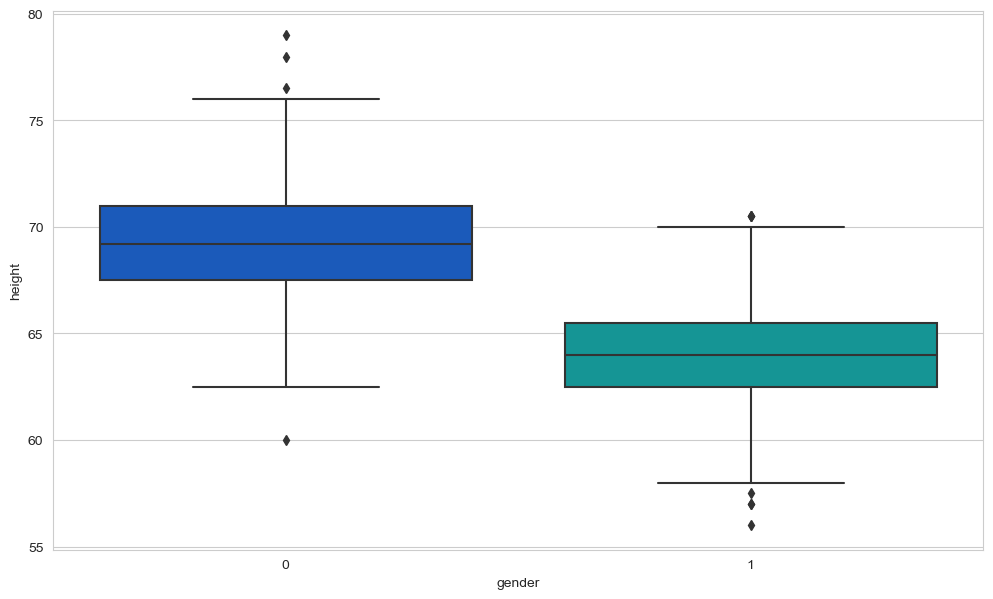

In [26]:
plt.figure(figsize = (12, 7))
sns.boxplot(x='gender',y = 'height', data = df, palette = 'winter')

Mean Squared Error: 12.01999646629591
Root Mean Squared Error: 3.4669866550501616
R-squared Score: 0.11584237747872972
Regression Line Equation: y = 0.39x + 23.39


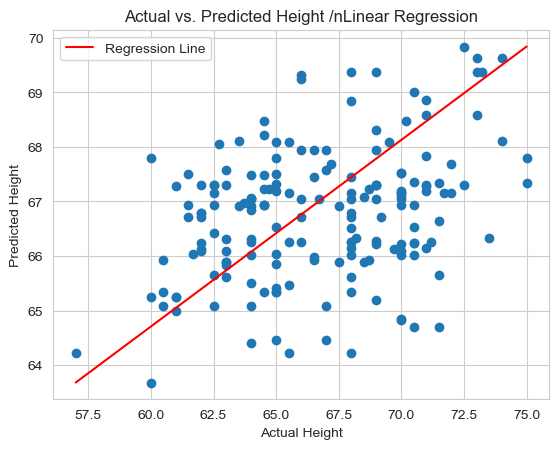

In [27]:
#linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('child_height.csv')
X = data[['father', 'mother']]
y = data['height'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

coef = model.coef_
intercept = model.intercept_
equation = "y = {:.2f}x + {:.2f}".format(coef[0], intercept)
print("Regression Line Equation:", equation)

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', label='Regression Line')
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.title("Actual vs. Predicted Height /nLinear Regression")
plt.legend()
plt.show()


Mean Squared Error: 14.026768855957972
Root Mean Squared Error: 3.7452328173236404
R-squared Score: -0.03177023704741311


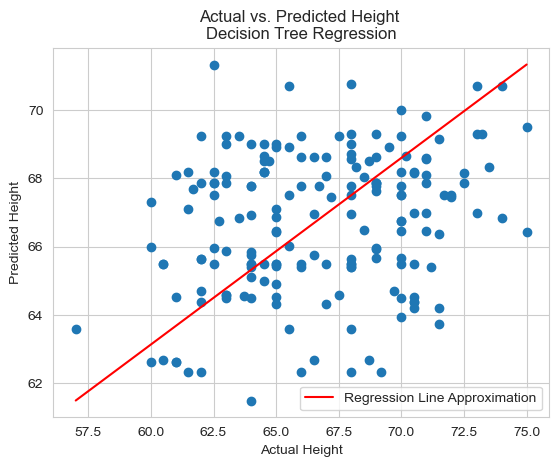

In [28]:
#decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('child_height.csv')
X = data[['father', 'mother']]  
y = data['height']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', label='Regression Line Approximation')
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.title("Actual vs. Predicted Height \nDecision Tree Regression")
plt.legend()
plt.show()

Mean Squared Error: 13.691817876909973
Root Mean Squared Error: 3.700245650887245
R-squared Score: -0.007132171460068282


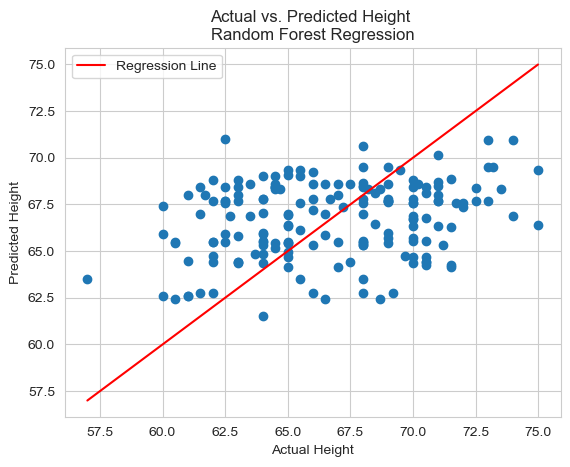

In [29]:
#random forest regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('child_height.csv')
X = data[['father', 'mother']]
y = data['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.title("Actual vs. Predicted Height \nRandom Forest Regression")
line = np.arange(min(y_test), max(y_test), 0.01)
plt.plot(line, line, color='red', linestyle='-', label='Regression Line')
plt.legend()
plt.show()

Mean Squared Error: 12.48694800134241
Root Mean Squared Error: 3.5336875924934863
R-squared Score: 0.08149471687691268
The accuracy of our model is 8.15%


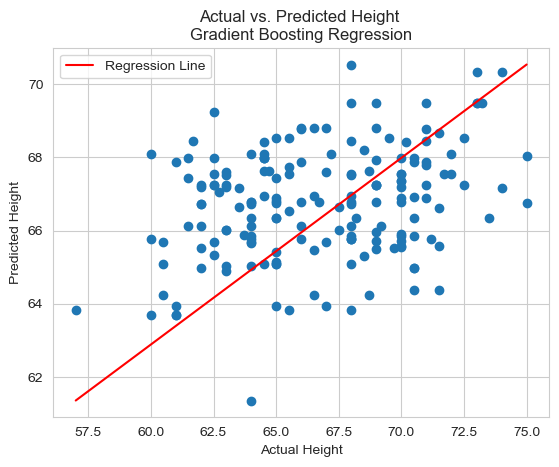

In [30]:
#gradient boosting regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('child_height.csv')
X = data[['father', 'mother']]
y = data['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)
score = r2_score(y_test, y_pred)
accuracy = score * 100
print("The accuracy of our model is {}%".format(round(accuracy, 2)))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', label='Regression Line')
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.title("Actual vs. Predicted Height \nGradient Boosting Regression")
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('child_height.csv')
X = data[['father', 'mother']]
y = data['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
slope = model.coef_[0]
intercept = model.intercept_
print("Regression Line Equation: y = {}x + {}".format(round(slope, 2), round(intercept, 2)))

Mean Squared Error: 12.01999646629591
Regression Line Equation: y = 0.39x + 23.39


Linear Regression: y = 0.39 * x1 + 0.25 * x2 + 23.39
Decision Tree: Equation not available for non-linear models.
Random Forest: Equation not available for non-linear models.
Gradient Boosting: Equation not available for non-linear models.


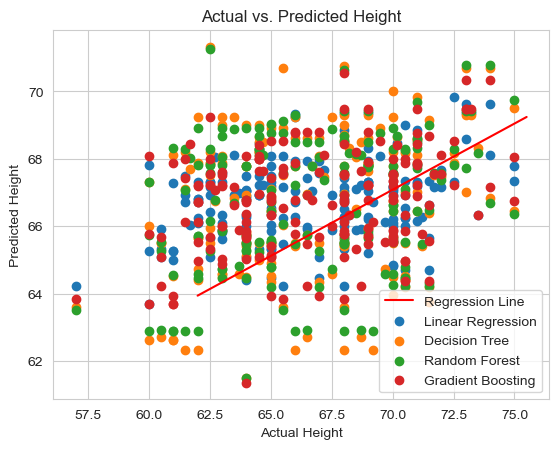

Linear Regression: R-squared Score = 0.11584237747872972
Decision Tree: R-squared Score = -0.03177023704741355
Random Forest: R-squared Score = -0.004703243033950644
Gradient Boosting: R-squared Score = 0.08149471687691268


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('child_height.csv')
X = data[['father', 'mother']]
y = data['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
r2_scores = []
for model, name in zip([linear_model, tree_model, forest_model, gradient_boosting_model], model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    if name == 'Linear Regression':
        coefficients = model.coef_
        intercept = model.intercept_
        print(f"{name}: y = {coefficients[0]:.2f} * x1 + {coefficients[1]:.2f} * x2 + {intercept:.2f}")
        x_line = np.linspace(min(X_test['father']), max(X_test['father']), 100)
        y_line = coefficients[0] * x_line + coefficients[1] * X_test['mother'].mean() + intercept
        plt.plot(x_line, y_line, color='red', label='Regression Line')
    else:
        print(f"{name}: Equation not available for non-linear models.")
    plt.scatter(y_test, y_pred, label=name)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.title("Actual vs. Predicted Height")
plt.legend()
plt.show()
for model, score in zip(model_names, r2_scores):
    print(f"{model}: R-squared Score = {score}")

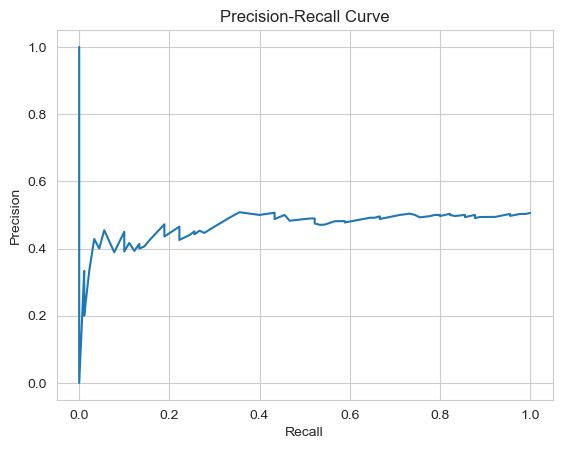

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('child_height.csv')
X = data[['father', 'mother']]
y = data['gender']  
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

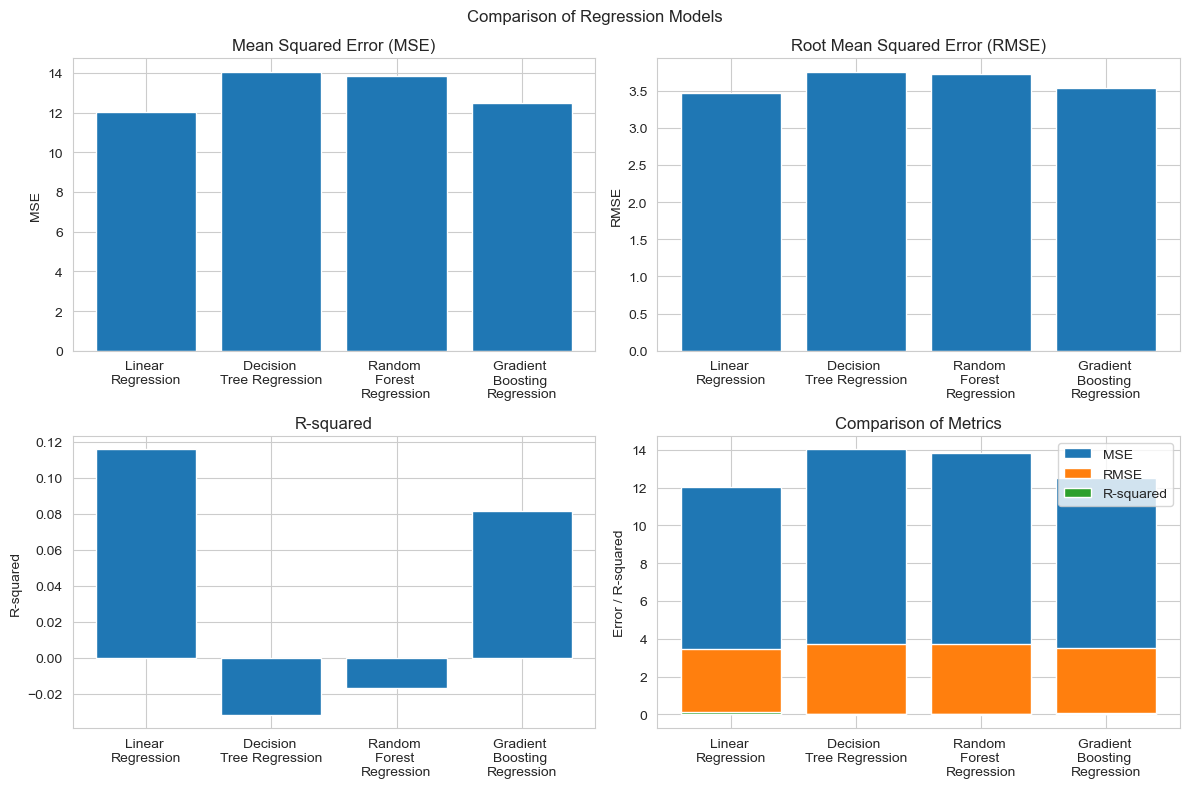

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('child_height.csv')
X = data[['father', 'mother']]
y = data['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear \nRegression': LinearRegression(),
    'Decision \nTree Regression': DecisionTreeRegressor(),
    'Random \nForest \nRegression': RandomForestRegressor(),
    'Gradient \nBoosting \nRegression': GradientBoostingRegressor()
}
metrics = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'R-squared': []
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    metrics['Model'].append(model_name)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R-squared'].append(r2)
metrics_df = pd.DataFrame(metrics)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparison of Regression Models')
axes[0, 0].bar(metrics_df['Model'], metrics_df['MSE'])
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('MSE')

axes[0, 1].bar(metrics_df['Model'], metrics_df['RMSE'])
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')

axes[1, 0].bar(metrics_df['Model'], metrics_df['R-squared'])
axes[1, 0].set_title('R-squared')
axes[1, 0].set_ylabel('R-squared')

axes[1, 1].bar(metrics_df['Model'], metrics_df['MSE'], label='MSE')
axes[1, 1].bar(metrics_df['Model'], metrics_df['RMSE'], label='RMSE')
axes[1, 1].bar(metrics_df['Model'], metrics_df['R-squared'], label='R-squared')
axes[1, 1].set_title('Comparison of Metrics')
axes[1, 1].set_ylabel('Error / R-squared')
axes[1, 1].legend()
plt.tight_layout()
plt.show()

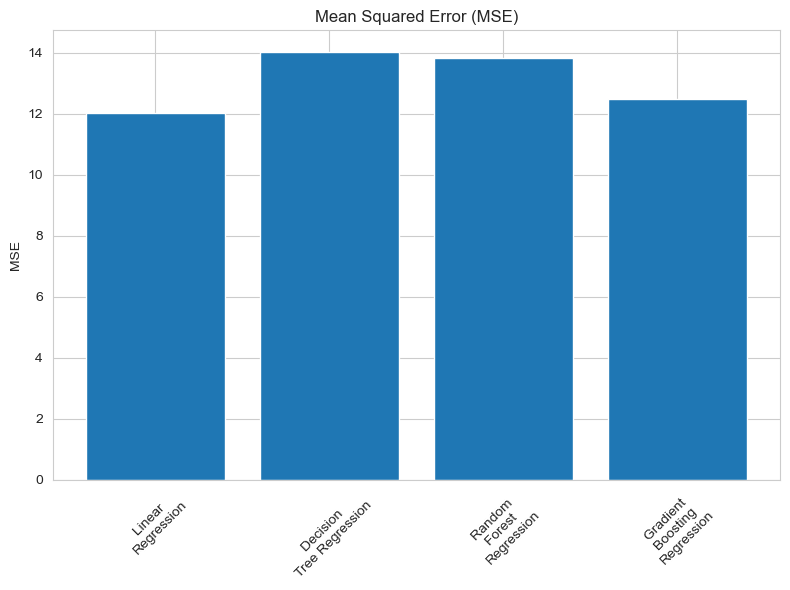

In [35]:
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Model'], metrics_df['MSE'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

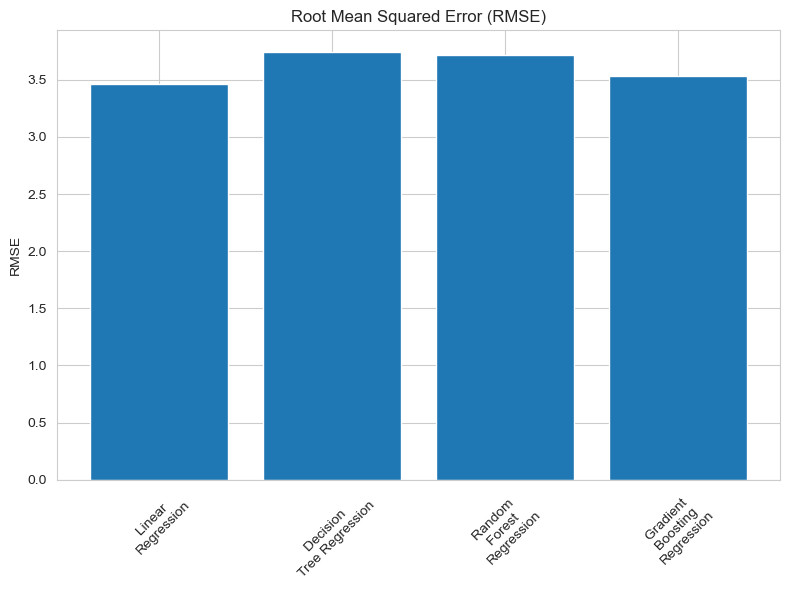

In [36]:
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Model'], metrics_df['RMSE'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

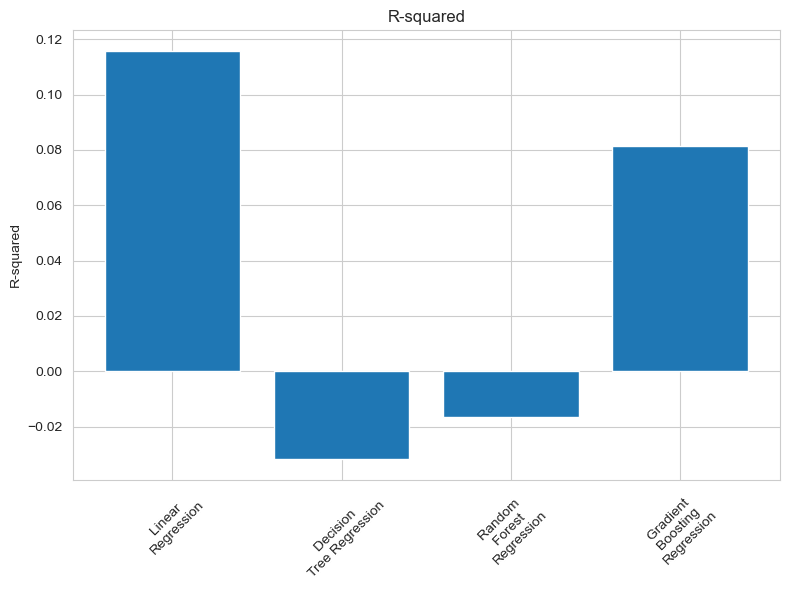

In [37]:
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Model'], metrics_df['R-squared'])
plt.title('R-squared')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

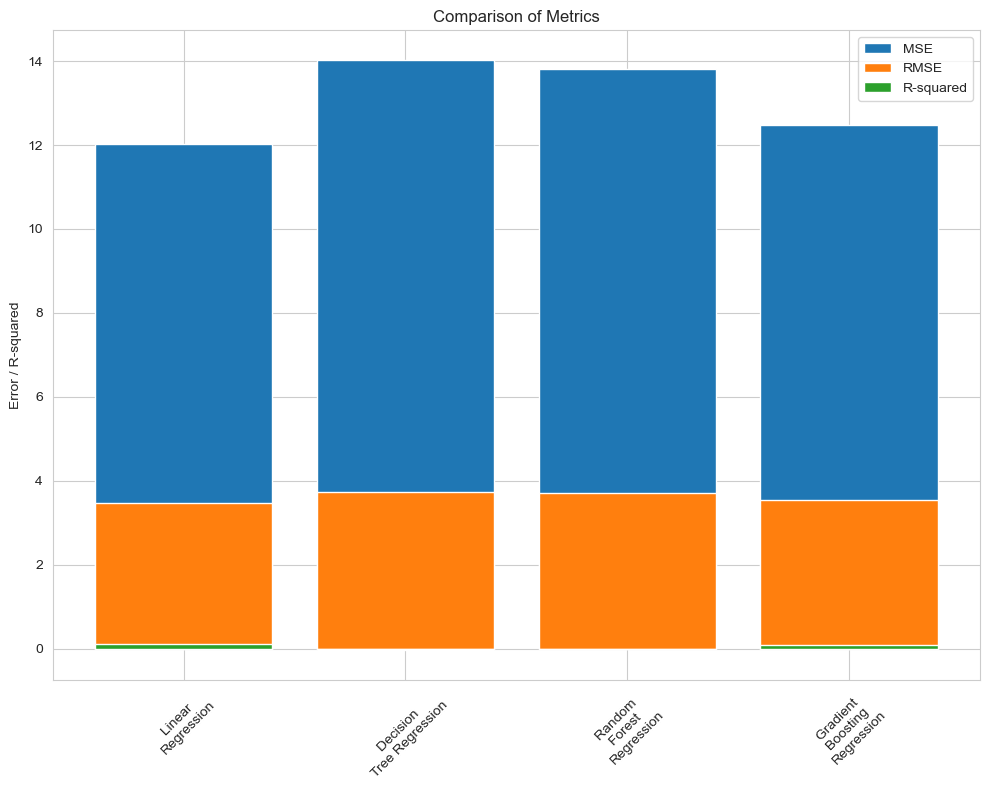

In [38]:
plt.figure(figsize=(10, 8))
plt.bar(metrics_df['Model'], metrics_df['MSE'], label='MSE')
plt.bar(metrics_df['Model'], metrics_df['RMSE'], label='RMSE')
plt.bar(metrics_df['Model'], metrics_df['R-squared'], label='R-squared')
plt.title('Comparison of Metrics')
plt.ylabel('Error / R-squared')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()